In [99]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Data Preparation

In [4]:
train_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],inplace=True)
test_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],inplace=True)

In [10]:
train_df.fillna({'GarageCond':'NA','GarageType':'NA','GarageFinish':'NA','GarageQual':'NA',
                'GarageYrBlt':1900,'BsmtExposure':'NA','BsmtFinType2':'NA','BsmtFinType1':'NA',
                'BsmtCond':'NA','BsmtQual':'NA','MasVnrArea':0,'MasVnrType':'None','Electrical':'SBrkr'},inplace=True)
test_df.fillna({'GarageCond':'NA','GarageType':'NA','GarageFinish':'NA','GarageQual':'NA',
                'GarageYrBlt':1900,'BsmtExposure':'NA','BsmtFinType2':'NA','BsmtFinType1':'NA',
                'BsmtCond':'NA','BsmtQual':'NA','MasVnrArea':0,'MasVnrType':'None','Electrical':'SBrkr'},inplace=True)

In [72]:
num_var = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
          'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
          'PoolArea','MiscVal','SalePrice']

cat_var = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterQual','ExterCond','BsmtQual','BsmtCond',
           'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
          'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageFinish',
          'GarageCars','GarageQual','GarageCond','PavedDrive','MoSold','YrSold']

nom_var = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
           'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
          'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType',
          'SaleType','SaleCondition']

## Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
corrmat = train_df.corr()

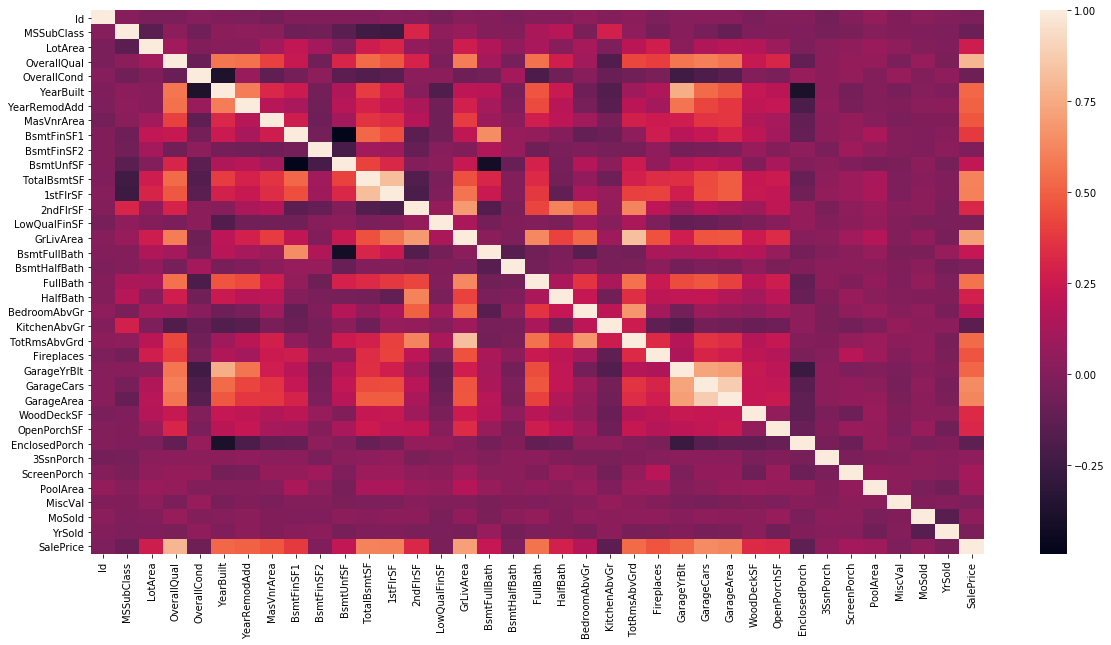

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(corrmat)

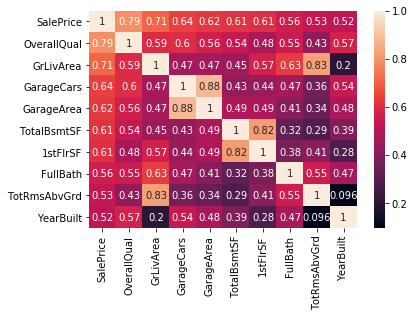

In [28]:
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.heatmap(cm,cbar=True,annot=True,yticklabels=cols.values, xticklabels= cols.values)

##  Let's look at GrLivArea

In [33]:
from scipy import stats
from scipy.stats import norm

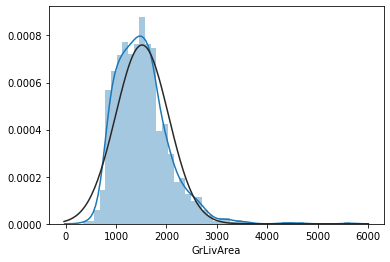

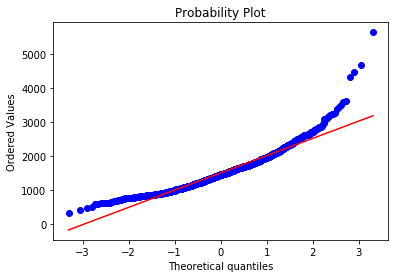

In [35]:
sns.distplot(train_df['GrLivArea'],fit=norm)
plt.figure()
res = stats.probplot(train_df['GrLivArea'],plot=plt)

In [36]:
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])

In [37]:
test_df['GrLivArea'] = np.log(test_df['GrLivArea'])

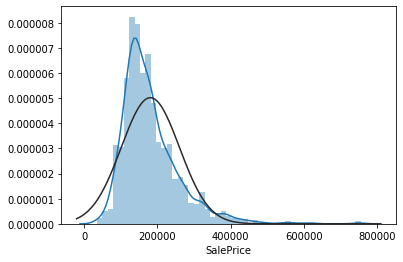

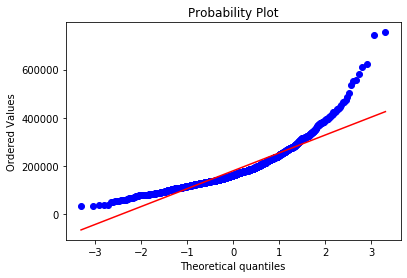

In [39]:
sns.distplot(train_df['SalePrice'],fit=norm)
plt.figure()
res = stats.probplot(train_df['SalePrice'],plot=plt)

In [40]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])

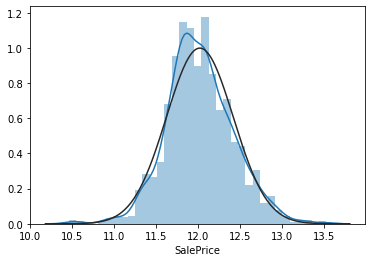

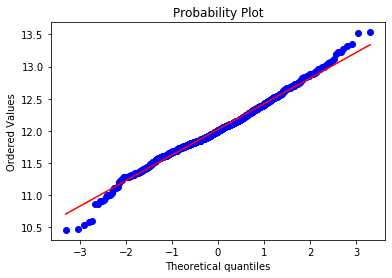

In [41]:
sns.distplot(train_df['SalePrice'],fit=norm)
plt.figure()
res = stats.probplot(train_df['SalePrice'],plot=plt)

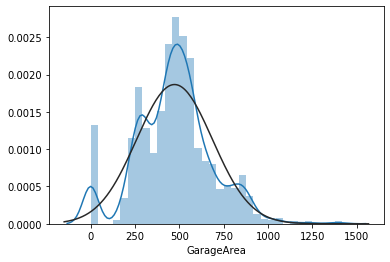

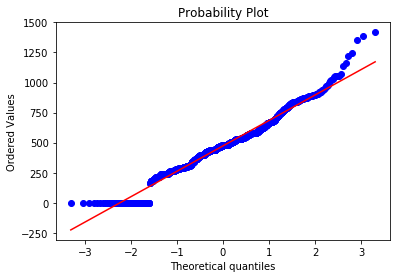

In [43]:
sns.distplot(train_df['GarageArea'],fit=norm)
plt.figure()
res = stats.probplot(train_df['GarageArea'],plot=plt)

In [44]:
train_df['GarageArea'] = train_df['GarageArea'].apply(lambda x:np.log(x) if x>0 else 0)
test_df['GarageArea'] = test_df['GarageArea'].apply(lambda x:np.log(x) if x>0 else 0)

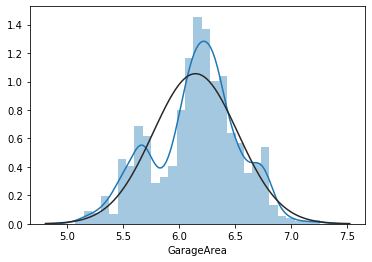

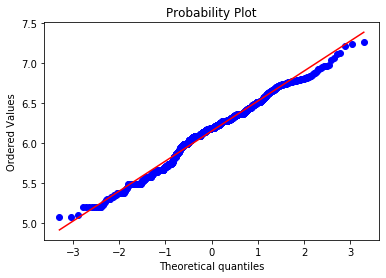

In [46]:
sns.distplot(train_df[train_df['GarageArea']>0]['GarageArea'],fit=norm)
plt.figure()
res = stats.probplot(train_df[train_df['GarageArea']>0]['GarageArea'],plot=plt)

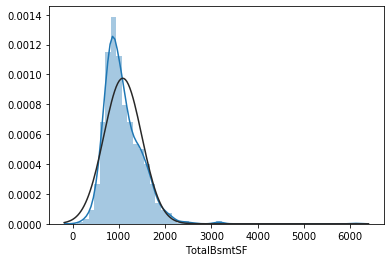

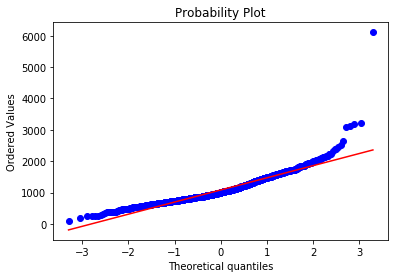

In [47]:
sns.distplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)
plt.figure()
res = stats.probplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

In [48]:
train_df['TotalBsmtSF'] = train_df['TotalBsmtSF'].apply(lambda x:np.log(x) if x>0 else 0)
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].apply(lambda x:np.log(x) if x>0 else 0)

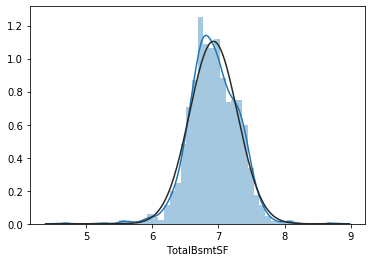

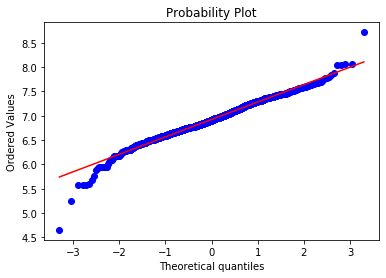

In [49]:
sns.distplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)
plt.figure()
res = stats.probplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

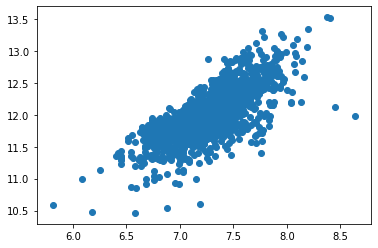

In [50]:
plt.scatter(train_df['GrLivArea'],train_df['SalePrice'])

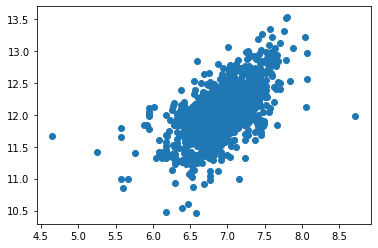

In [52]:
plt.scatter(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'],train_df[train_df['TotalBsmtSF']>0]['SalePrice'])

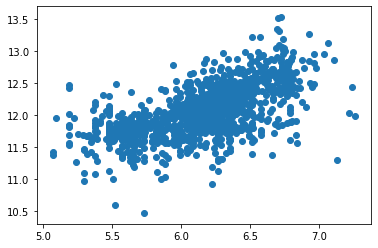

In [53]:
plt.scatter(train_df[train_df['GarageArea']>0]['GarageArea'],train_df[train_df['GarageArea']>0]['SalePrice'])

In [64]:
def nom_anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = nom_var
    pvals = []
    for c in nom_var:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c]==cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

In [65]:
a = nom_anova(train_df)
a['disparity'] = np.log(1/a['pval'].values)

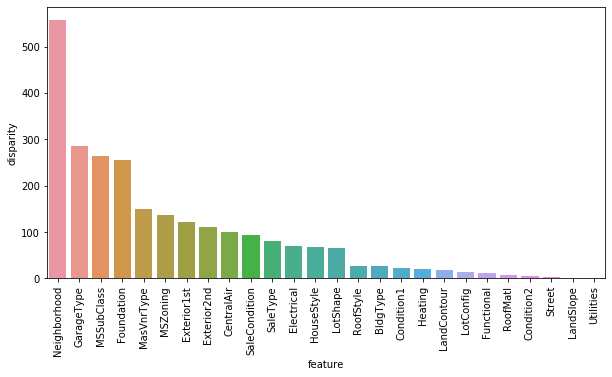

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(data=a, x='feature', y = 'disparity')
x = plt.xticks(rotation=90)

In [67]:
def cat_anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = cat_var
    pvals = []
    for c in cat_var:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c]==cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

In [73]:
b = cat_anova(train_df)
b['disparity'] = np.log(1/b['pval'].values)

C:\Users\jnrah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


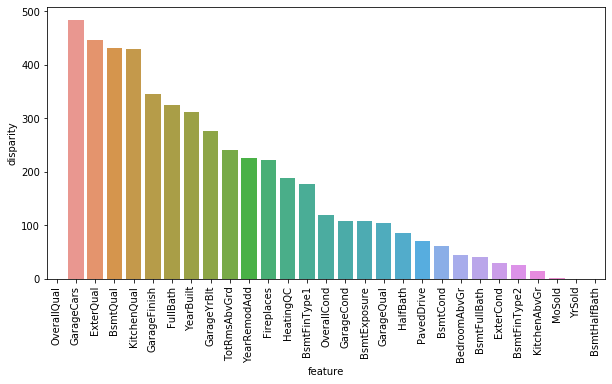

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(data=b, x='feature', y = 'disparity')
x = plt.xticks(rotation=90)

## Variable Selection

In [85]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [221]:
training_set = train_df[['Id','SalePrice','OverallQual','GrLivArea','GarageArea','TotalBsmtSF','Neighborhood',
                        'GarageType','Foundation','MSSubClass','ExterQual','BsmtQual','KitchenQual','GarageFinish',
                        'FullBath','YearBuilt']]
predicition_set = test_df[['Id','OverallQual','GrLivArea','GarageArea','TotalBsmtSF','Neighborhood',
                        'GarageType','Foundation','MSSubClass','ExterQual','BsmtQual','KitchenQual','GarageFinish',
                        'FullBath','YearBuilt']]

In [222]:
exter_qual = {'Ex':5,'Gd':4,'TA':3,'Fa':2}
bsmt_qual = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'NA':0}
kitch_qual = {'Ex':5,'Gd':4,'TA':3,'Fa':2}
grg_fin = {'Fin':3,'RFn':2,'Unf':1,'NA':0}

In [223]:
training_set['ExterQual'] = training_set['ExterQual'].apply(lambda x:exter_qual.get(x,0))
training_set['BsmtQual'] = training_set['BsmtQual'].apply(lambda x:bsmt_qual.get(x,0))
training_set['KitchenQual'] = training_set['KitchenQual'].apply(lambda x:kitch_qual.get(x,0))
training_set['GarageFinish'] = training_set['GarageFinish'].apply(lambda x:grg_fin.get(x,0))
training_set['MSSubClass'] = training_set['MSSubClass'].apply(lambda x:'MS'+str(x))
training_set['Foundation'] = training_set['Foundation'].apply(lambda x:'Others' if(x in ['Slab','Stone','Wood']) else x)
training_set['MSSubClass'] = training_set['MSSubClass'].apply(lambda x:x if(x in ['MS20','MS60','MS50']) else 'Others')

In [224]:
predicition_set['ExterQual'] = predicition_set['ExterQual'].apply(lambda x:exter_qual.get(x,0))
predicition_set['BsmtQual'] = predicition_set['BsmtQual'].apply(lambda x:bsmt_qual.get(x,0))
predicition_set['KitchenQual'] = predicition_set['KitchenQual'].apply(lambda x:kitch_qual.get(x,0))
predicition_set['GarageFinish'] = predicition_set['GarageFinish'].apply(lambda x:grg_fin.get(x,0))
predicition_set['MSSubClass'] = predicition_set['MSSubClass'].apply(lambda x:'MS'+str(x))
predicition_set['Foundation'] = predicition_set['Foundation'].apply(lambda x:'Others' if(x in ['Slab','Stone','Wood']) else x)
predicition_set['MSSubClass'] = predicition_set['MSSubClass'].apply(lambda x:x if(x in ['MS20','MS60','MS50']) else 'Others')

In [225]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [226]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self, attribute_name):
        self.attribute_name = attribute_name
    def fit(self, X , y=None):
        return self
    def transform(self,X):
        return X[self.attribute_name].values

In [227]:
num_attribs = ['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','ExterQual','BsmtQual','KitchenQual',
              'GarageFinish','FullBath','YearBuilt']
cat_attribs = ['Neighborhood','GarageType','Foundation','MSSubClass']

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
train_set, test_set = train_test_split(training_set,test_size = 0.3, random_state=42)

In [230]:
train_set_labels = train_set['SalePrice']
test_set_labels = test_set['SalePrice']

In [231]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('std_scalar',StandardScaler()),
])

In [232]:
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('encoder',OneHotEncoder()),
])

In [233]:
from sklearn.pipeline import FeatureUnion

In [234]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [235]:
train_set_prepared = full_pipeline.fit_transform(train_set)
test_set_prepared = full_pipeline.fit_transform(test_set)

## Linear Regression

In [197]:
from sklearn.linear_model import LinearRegression

In [238]:
lin_reg = LinearRegression()

In [239]:
lin_reg.fit(train_set_prepared,train_set_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [240]:
from sklearn.metrics import mean_squared_error

In [241]:
test_set_pred = lin_reg.predict(test_set_prepared)

In [242]:
lin_mse = mean_squared_error(test_set_pred,test_set_labels)
lin_rmse = np.sqrt(lin_mse)

In [243]:
pred_set_prepared = full_pipeline.fit_transform(predicition_set)

In [248]:
predictions = lin_reg.predict(pred_set_prepared)

In [258]:
final_pred = pd.DataFrame(zip(predicition_set['Id'],predictions))
final_pred.rename(columns={0:'Id',1:'SalePrice'},inplace=True)
final_pred['SalePrice'] = np.exp(final_pred['SalePrice'])

In [260]:
final_pred.to_csv('lin_reg_predictions.csv',index=False)